In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Cleaned_Data5.csv')

C:\Users\batka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.dtypes

Unnamed: 0       int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
year             int64
month            int64
day              int64
week             int64
weekday          int64
dayofyear        int64
dtype: object

In [4]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [5]:
df.rename(columns={'TotalPrice' : 'TotalSales'}, inplace = True)

In [6]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [7]:
df1 = df

In [8]:
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [9]:
# result = seasonal_decompose(df1['TotalSales'],model ='multiplicative')


In [10]:
df2 = df1.groupby(['CustomerID'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending =False)
df2.head()

,CustomerID,InvoiceNo
4041,17841.0,7812
1894,14911.0,5896
1299,14096.0,5128
330,12748.0,4458
1673,14606.0,2759


In [11]:
df3 = df1.groupby(['CustomerID'])['TotalSales'].sum().reset_index().sort_values('TotalSales', ascending =False)
df3.head()

,CustomerID,TotalSales
1702,14646.0,279489.02
4232,18102.0,256438.49
3757,17450.0,187322.17
1894,14911.0,132458.73
55,12415.0,123725.45


In [12]:
merged = pd.merge(df2, df3, on = 'CustomerID', how = 'inner')
merged.head()

,CustomerID,InvoiceNo,TotalSales
0,17841.0,7812,39869.05
1,14911.0,5896,132458.73
2,14096.0,5128,57120.91
3,12748.0,4458,28405.56
4,14606.0,2759,11633.35


In [13]:
#merged.boxplot()

In [14]:
Q1 = merged.TotalSales.quantile(0.05)
Q3 = merged.TotalSales.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.TotalSales>= Q1-1.5*IQR)&(merged.TotalSales<=Q3+1.5*IQR)]

In [15]:
Q1 = merged.InvoiceNo.quantile(0.05)
Q3 = merged.InvoiceNo.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.InvoiceNo>= Q1-1.5*IQR)&(merged.InvoiceNo<=Q3+1.5*IQR)]

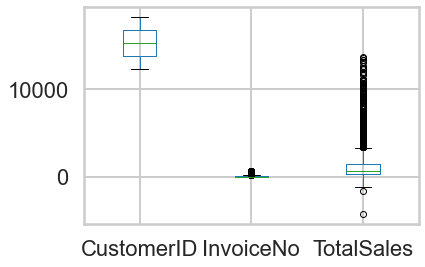

In [16]:
merged.boxplot()

In [17]:
merged.head()

,CustomerID,InvoiceNo,TotalSales
32,17338.0,725,6461.79
34,18283.0,721,2045.53
36,16764.0,712,2749.95
37,15547.0,695,4910.60
38,17735.0,690,13110.02


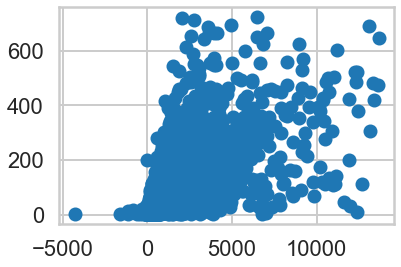

In [18]:
plt.scatter(merged['TotalSales'],merged['InvoiceNo'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_scaled =scaler.fit_transform(merged)
merged_scaled.shape

(4294, 3)

In [20]:
kmeans = KMeans(n_clusters=4, max_iter = 50)
kmeans.fit(merged_scaled)

KMeans(max_iter=50, n_clusters=4)

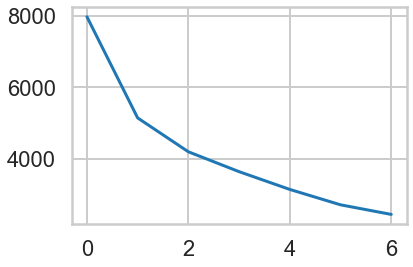

In [21]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    ssd.append(kmeans.inertia_)
    

plt.plot(ssd)

In [22]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(merged_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

NameError: name 'silhouette_score' is not defined

In [23]:
kmeans= KMeans(n_clusters =4, max_iter =50)
kmeans.fit(merged_scaled)
kmeans.labels_

array([3, 3, 3, ..., 0, 2, 2])

In [24]:
merged['clusterN'] = kmeans.labels_
merged.head()

,CustomerID,InvoiceNo,TotalSales,clusterN
32,17338.0,725,6461.79,3
34,18283.0,721,2045.53,3
36,16764.0,712,2749.95,3
37,15547.0,695,4910.60,3
38,17735.0,690,13110.02,3


In [ ]:
df9 = merged.set_index('CustomerID', inplace =True)

In [ ]:
sns.boxplot(x='clusterN', y='TotalSales', data=merged)

In [ ]:
sns.boxplot(x='clusterN', y='InvoiceNo', data=merged)

In [ ]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df2[['CustomerID', 'InvoiceNo']])
y_pred

In [ ]:
#df3 = df2[df2.cluster==0]
#df4 = df2[df2.cluster==1]
#df5 = df2[df2.cluster==2]
#df6 = df2[df2.cluster==3]
#plt.scatter(df3.CustomerID,df3.InvoiceNo, color = 'green')
#plt.scatter(df4.CustomerID,df4.InvoiceNo, color ='red')
#plt.scatter(df5.CustomerID,df5.InvoiceNo, color ='blue')
#plt.scatter(df6.CustomerID,df6.InvoiceNo, color = 'yellow')

#plt.xlabel('Customers')
#plt.ylabel('Frequency')

In [ ]:
#kmeans.cluster_centers_

In [ ]:
import sklearn.cluster
import numpy as np


ss = []


assignments = {}


X = pivoted.to_numpy()


Krange  = list(range(2, 20))

 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    

plt.plot(Krange, ss)

 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

In [ ]:
# What is the best K? Fill in the assignment below appropriately
best_K = 10
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.bar(range(best_K), counts, align = 'center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.colors

# Make a variable called pca. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
pca = sklearn.cluster.KMeans(n_clusters=4)
# Call a fit_predict() on X 
assigned_cluster_pca = pca.fit_predict(X)
centers = pca.cluster_centers_


# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))

#Drop scatter plot and centers 
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(pc1, pc2, alpha=0.7, c=assigned_cluster_pca.tolist(), cmap='viridis', s=20)

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2)
pyplot.show()

In [ ]:
df5 = df1.groupby('InvoiceDate').agg({'InvoiceNo':'count', 'TotalSales':'sum'})
df5.head(13)

In [ ]:
sns.lineplot(x='InvoiceDate', y='TotalSales', data = df5)

In [ ]:
sns.boxplot(x='InvoiceNo', y='TotalSales', data=df5)

In [ ]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

# Do the rest on your own :)
variance = pca.explained_variance_ratio_

# Plot() it 
plt.plot(range(len(variance)), variance)

# Label the axes
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")

Time series

In [ ]:
df5.columns=["InvoiceDate","InvoiceNo",'TotalSales']
df5.head()
df5.describe()
df5.set_index('InvoiceDate',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df5.plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df5['TotalSales'])
print(test_result)

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#if result.loc['p-value'] <= 0.05:
    #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
#else:
    #print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df5['TotalSales'])

In [ ]:
df5['Sales First Difference'] = df5['TotalSales'] - df5['TotalSales'].shift(1)
df5['Seasonal First Difference']=df5['TotalSales']-df5['TotalSales'].shift(12)
df5.head()

In [ ]:
adfuller_test(df5['Seasonal First Difference'].dropna())

In [ ]:
df5['Seasonal First Difference'].plot()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df5['TotalSales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df5['TotalSales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
df5['forecast']=model_fit.predict(start=280,end=300,dynamic=True)
df5[['TotalSales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df5['TotalSales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df5['forecast']=results.predict(start=280,end=300,dynamic=True)
df5[['TotalSales','forecast']].plot(figsize=(12,8))

In [ ]:
results.predict(start=345,end=372,dynamic=True)

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df5.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df5.columns)

future_datest_df.tail()

future_df=pd.concat([df5,future_datest_df])

future_df['forecast'] = results.predict(start = 280, end = 320, dynamic= True)
future_df[['TotalSales', 'forecast']].plot(figsize=(15, 11))

In [ ]:
results.predict(start = 2011-11-31, end = 2012-1-25, dynamic= True)